<a href="https://colab.research.google.com/github/ajaykumar080286/MachineLearning/blob/main/RregressionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import pandas as pd

In [153]:
import numpy as np

In [154]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, accuracy_score,r2_score


In [155]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)

# Determine the number of complete records (pairs of rows)
num_records = raw_df.shape[0] // 2

# Slice both even and odd rows to ensure they have the same number of records
data_part1 = raw_df.values[::2, :][:num_records]
data_part2 = raw_df.values[1::2, :2][:num_records]

data = np.hstack([data_part1, data_part2])
target = raw_df.values[1::2, 2][:num_records]


In [156]:
# Column names from original dataset
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

# Create DataFrame with headers
df_boston = pd.DataFrame(data, columns=columns)
df_boston["MEDV"] = target   # target column



In [157]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [158]:
X=df_boston.iloc[:,0:13]
y=df_boston.iloc[:,13]

In [159]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [160]:
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [161]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [162]:
rt=DecisionTreeRegressor(criterion='squared_error', max_depth=5)

In [163]:
rt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [164]:
y_pred=rt.predict(X_test)

In [165]:
r2_score(y_test, y_pred)

0.7224163455290411

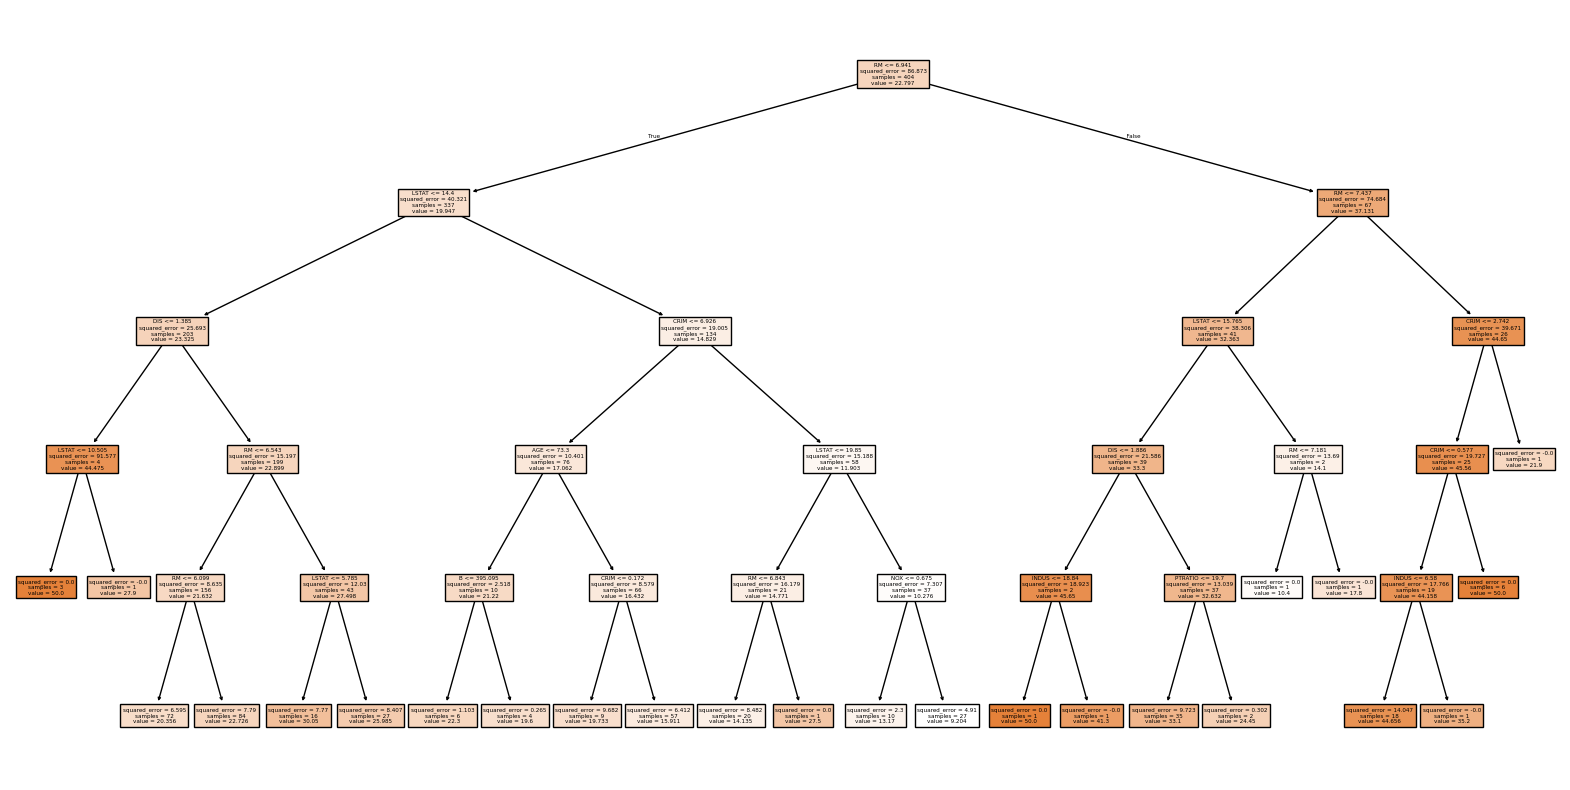

In [177]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(rt, feature_names=X_train.columns, filled=True)
plt.show()

**HyperTunning**

In [166]:
param_grid={
  'max_depth':[2,4,8,10,None],
  'criterion':['squared_error','absolute_error'],
  'max_features':[0.25,0.5, 1.0],
  'min_samples_split':[0.25,0.5,1]


}

In [167]:
reg=GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid)

In [168]:
reg.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/util

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1]})

In [169]:
reg.best_score_

np.float64(0.6518007751221422)

In [170]:
reg.best_params_

{'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 0.5,
 'min_samples_split': 0.25}



```
# This is formatted as code
```

FeatureImportant **bold text**

In [171]:
for importance, name in sorted(zip(rt.feature_importances_,X_train.columns), reverse=True):
  print(name, importance)

RM 0.6353486570603094
LSTAT 0.22738213470406848
DIS 0.06659581258598431
CRIM 0.05220097413927051
AGE 0.006176126174366322
PTRATIO 0.004391097507128723
INDUS 0.003801428078256599
NOX 0.0035610403857024306
B 0.0005427293649131189
ZN 0.0
TAX 0.0
RAD 0.0
CHAS 0.0


In [172]:
rt.feature_importances_

array([5.22009741e-02, 0.00000000e+00, 3.80142808e-03, 0.00000000e+00,
       3.56104039e-03, 6.35348657e-01, 6.17612617e-03, 6.65958126e-02,
       0.00000000e+00, 0.00000000e+00, 4.39109751e-03, 5.42729365e-04,
       2.27382135e-01])

In [173]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [174]:
for a,b in sorted(zip(rt.feature_importances_,X_train.columns), reverse=True):
  print(b,"---->",a)

RM ----> 0.6353486570603094
LSTAT ----> 0.22738213470406848
DIS ----> 0.06659581258598431
CRIM ----> 0.05220097413927051
AGE ----> 0.006176126174366322
PTRATIO ----> 0.004391097507128723
INDUS ----> 0.003801428078256599
NOX ----> 0.0035610403857024306
B ----> 0.0005427293649131189
ZN ----> 0.0
TAX ----> 0.0
RAD ----> 0.0
CHAS ----> 0.0


[Text(0.5697674418604651, 0.9166666666666666, 'x[5] <= 6.941\nsquared_error = 86.873\nsamples = 404\nvalue = 22.797'),
 Text(0.27325581395348836, 0.75, 'x[12] <= 14.4\nsquared_error = 40.321\nsamples = 337\nvalue = 19.947'),
 Text(0.4215116279069767, 0.8333333333333333, 'True  '),
 Text(0.10465116279069768, 0.5833333333333334, 'x[7] <= 1.385\nsquared_error = 25.693\nsamples = 203\nvalue = 23.325'),
 Text(0.046511627906976744, 0.4166666666666667, 'x[12] <= 10.505\nsquared_error = 91.577\nsamples = 4\nvalue = 44.475'),
 Text(0.023255813953488372, 0.25, 'squared_error = 0.0\nsamples = 3\nvalue = 50.0'),
 Text(0.06976744186046512, 0.25, 'squared_error = -0.0\nsamples = 1\nvalue = 27.9'),
 Text(0.16279069767441862, 0.4166666666666667, 'x[5] <= 6.543\nsquared_error = 15.197\nsamples = 199\nvalue = 22.899'),
 Text(0.11627906976744186, 0.25, 'x[5] <= 6.099\nsquared_error = 8.635\nsamples = 156\nvalue = 21.632'),
 Text(0.09302325581395349, 0.08333333333333333, 'squared_error = 6.595\nsamples = 

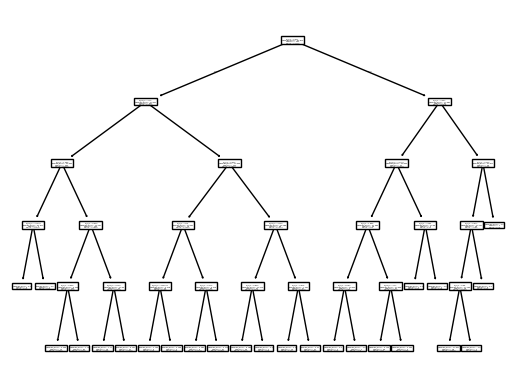

In [178]:
from sklearn.tree import plot_tree
plot_tree(rt)